<a href="https://colab.research.google.com/github/majavk/Data_Science_Portfolio/blob/main/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np
import pandas as pd
import pandas.util.testing as tm
import seaborn as sns
import sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import PolynomialFeatures
import warnings


In [2]:
warnings.filterwarnings("ignore")


In [3]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


#Data description

In [4]:
path = '../DATA'
raw_data_train = pd.read_csv(path + 'train.csv')
raw_data_test = pd.read_csv(path + 'test.csv')


In [5]:
df_train = raw_data_train.copy()
df_test = raw_data_test.copy()


In [6]:
filename = path + 'data_description.txt'
with open(filename,'r') as file:
  print(file.read())
  

MSSubClass: Identifies the type of dwelling involved in the sale.	

        20	1-STORY 1946 & NEWER ALL STYLES
        30	1-STORY 1945 & OLDER
        40	1-STORY W/FINISHED ATTIC ALL AGES
        45	1-1/2 STORY - UNFINISHED ALL AGES
        50	1-1/2 STORY FINISHED ALL AGES
        60	2-STORY 1946 & NEWER
        70	2-STORY 1945 & OLDER
        75	2-1/2 STORY ALL AGES
        80	SPLIT OR MULTI-LEVEL
        85	SPLIT FOYER
        90	DUPLEX - ALL STYLES AND AGES
       120	1-STORY PUD (Planned Unit Development) - 1946 & NEWER
       150	1-1/2 STORY PUD - ALL AGES
       160	2-STORY PUD - 1946 & NEWER
       180	PUD - MULTILEVEL - INCL SPLIT LEV/FOYER
       190	2 FAMILY CONVERSION - ALL STYLES AND AGES

MSZoning: Identifies the general zoning classification of the sale.
		
       A	Agriculture
       C	Commercial
       FV	Floating Village Residential
       I	Industrial
       RH	Residential High Density
       RL	Residential Low Density
       RP	Residential Low Density Park 
       RM

###Dictionary - data description

In [7]:
filename = path + 'data_description.txt'
with open(filename,'r') as file:
  file_content = file.readlines()
  file_list = list()
  d_info = {}
  for item in file_content:
    item = item.strip().lstrip()
    if item != '':
      file_list.append(item)
      if ':' in item:
        d_info[item.split(':')[0]] = item.split(':')[1]
      elif '\t' in item:
        item.split('\t')
        d_info[item.split('\t')[0]] = item.split('\t')[1]


In [9]:
df_train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [10]:
df_train = df_train.drop('Id', axis=1)


In [11]:
df_test.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [12]:
id_test = df_test['Id']


#Exploratory data analysis

In [13]:
df_train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 80 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1460 non-null   int64  
 1   MSZoning       1460 non-null   object 
 2   LotFrontage    1201 non-null   float64
 3   LotArea        1460 non-null   int64  
 4   Street         1460 non-null   object 
 5   Alley          91 non-null     object 
 6   LotShape       1460 non-null   object 
 7   LandContour    1460 non-null   object 
 8   Utilities      1460 non-null   object 
 9   LotConfig      1460 non-null   object 
 10  LandSlope      1460 non-null   object 
 11  Neighborhood   1460 non-null   object 
 12  Condition1     1460 non-null   object 
 13  Condition2     1460 non-null   object 
 14  BldgType       1460 non-null   object 
 15  HouseStyle     1460 non-null   object 
 16  OverallQual    1460 non-null   int64  
 17  OverallCond    1460 non-null   int64  
 18  YearBuil

###Outliers
The target, dependent variable, 'SalePrice' has skewed distribution.

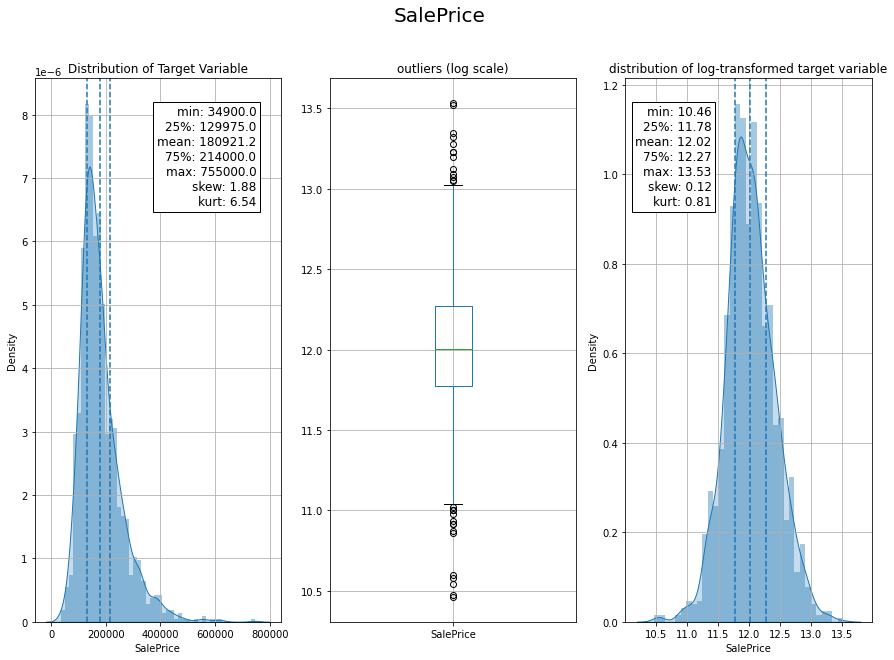

In [14]:
x = "SalePrice"
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,10))
fig.suptitle(x, fontsize=20)
ax[0].title.set_text('Distribution of Target Variable')
variable = df_train[x]
breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[0])

des = df_train[x].describe()
ax[0].axvline(des["25%"], ls='--')
ax[0].axvline(des["mean"], ls='--')
ax[0].axvline(des["75%"], ls='--')
ax[0].grid(True)

skewness = round(df_train['SalePrice'].skew(),2)
kurtosis = round(df_train['SalePrice'].kurt(),2)

des = round(des, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des["min"], "25%: "+des["25%"], "mean: "+des["mean"], "75%: "+des["75%"], "max: "+des["max"], "skew: "+str(skewness), "kurt: "+str(kurtosis)))
ax[0].text(0.90, 0.95, box, transform=ax[0].transAxes, fontsize=12, va='top', ha="right", bbox=dict(boxstyle='square', facecolor='white', alpha=1))


ax[1].title.set_text('outliers (log scale)')
tmp_df_train = pd.DataFrame(df_train[x])
tmp_df_train[x] = np.log(tmp_df_train[x])
tmp_df_train.boxplot(column=x, ax=ax[1])

### log transform data

ax[2].title.set_text('distribution of log-transformed target variable')
variable = tmp_df_train[x]

breaks = np.quantile(variable, q=np.linspace(0, 1, 11))
variable = variable[ (variable > breaks[0]) & (variable < 
                    breaks[10]) ]
sns.distplot(variable, hist=True, kde=True, kde_kws={"shade": True}, ax=ax[2])
des_log = tmp_df_train[x].describe()
ax[2].axvline(des_log["25%"], ls='--')
ax[2].axvline(des_log["mean"], ls='--')
ax[2].axvline(des_log["75%"], ls='--')
ax[2].grid(True)
skewness = round(tmp_df_train[x].skew(),2)
kurtosis = round(tmp_df_train[x].kurt(),2)
des_log = round(des_log, 2).apply(lambda x: str(x))
box = '\n'.join(("min: "+des_log["min"], "25%: "+des_log["25%"], "mean: "+des_log["mean"], "75%: "+des_log["75%"], "max: "+des_log["max"], "skew: "+str(skewness), "kurt: "+str(kurtosis)))
ax[2].text(2.75, 0.95, box, transform=ax[0].transAxes, fontsize=12, va='top', ha="right", bbox=dict(boxstyle='square', facecolor='white', alpha=1))
plt.show()


In [15]:
df_train.corr()['SalePrice'].sort_values(ascending=False)


SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePrice, dtype: float64

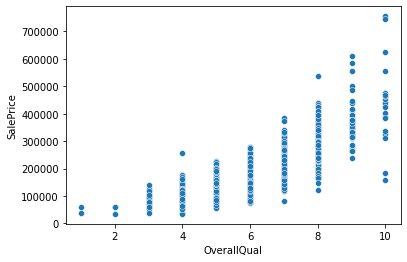

In [16]:
sns.scatterplot(x='OverallQual', y='SalePrice', data=df_train)


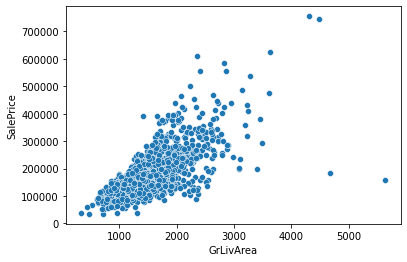

In [17]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train)


The two houses with the overall quality 10 and high ground living area are with the too low price compared to the dataset and therefor will be treated as an outliers.

In [18]:
df_train[(df_train['OverallQual'] > 8) & (df_train[ 'SalePrice'] <= 200000)]


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
523,60,RL,130.0,40094,Pave,NaN,IR1,Bnk,AllPub,Inside,...,0,NaN,NaN,NaN,0,10,2007,New,Partial,184750
1298,60,RL,313.0,63887,Pave,NaN,IR3,Bnk,AllPub,Corner,...,480,Gd,NaN,NaN,0,1,2008,New,Partial,160000


In [19]:
outlier_index = df_train[(df_train['GrLivArea'] > 4000) & (df_train[ 'SalePrice'] < 400000)].index


In [20]:
df_train = df_train.drop(outlier_index, axis=0)


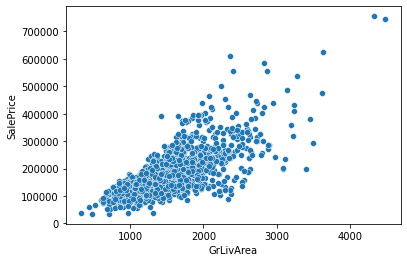

In [21]:
sns.scatterplot(x='GrLivArea', y='SalePrice', data=df_train)


In [23]:
df_train.to_csv(path + 'train_dropped_outliers.csv')


##Missing Data

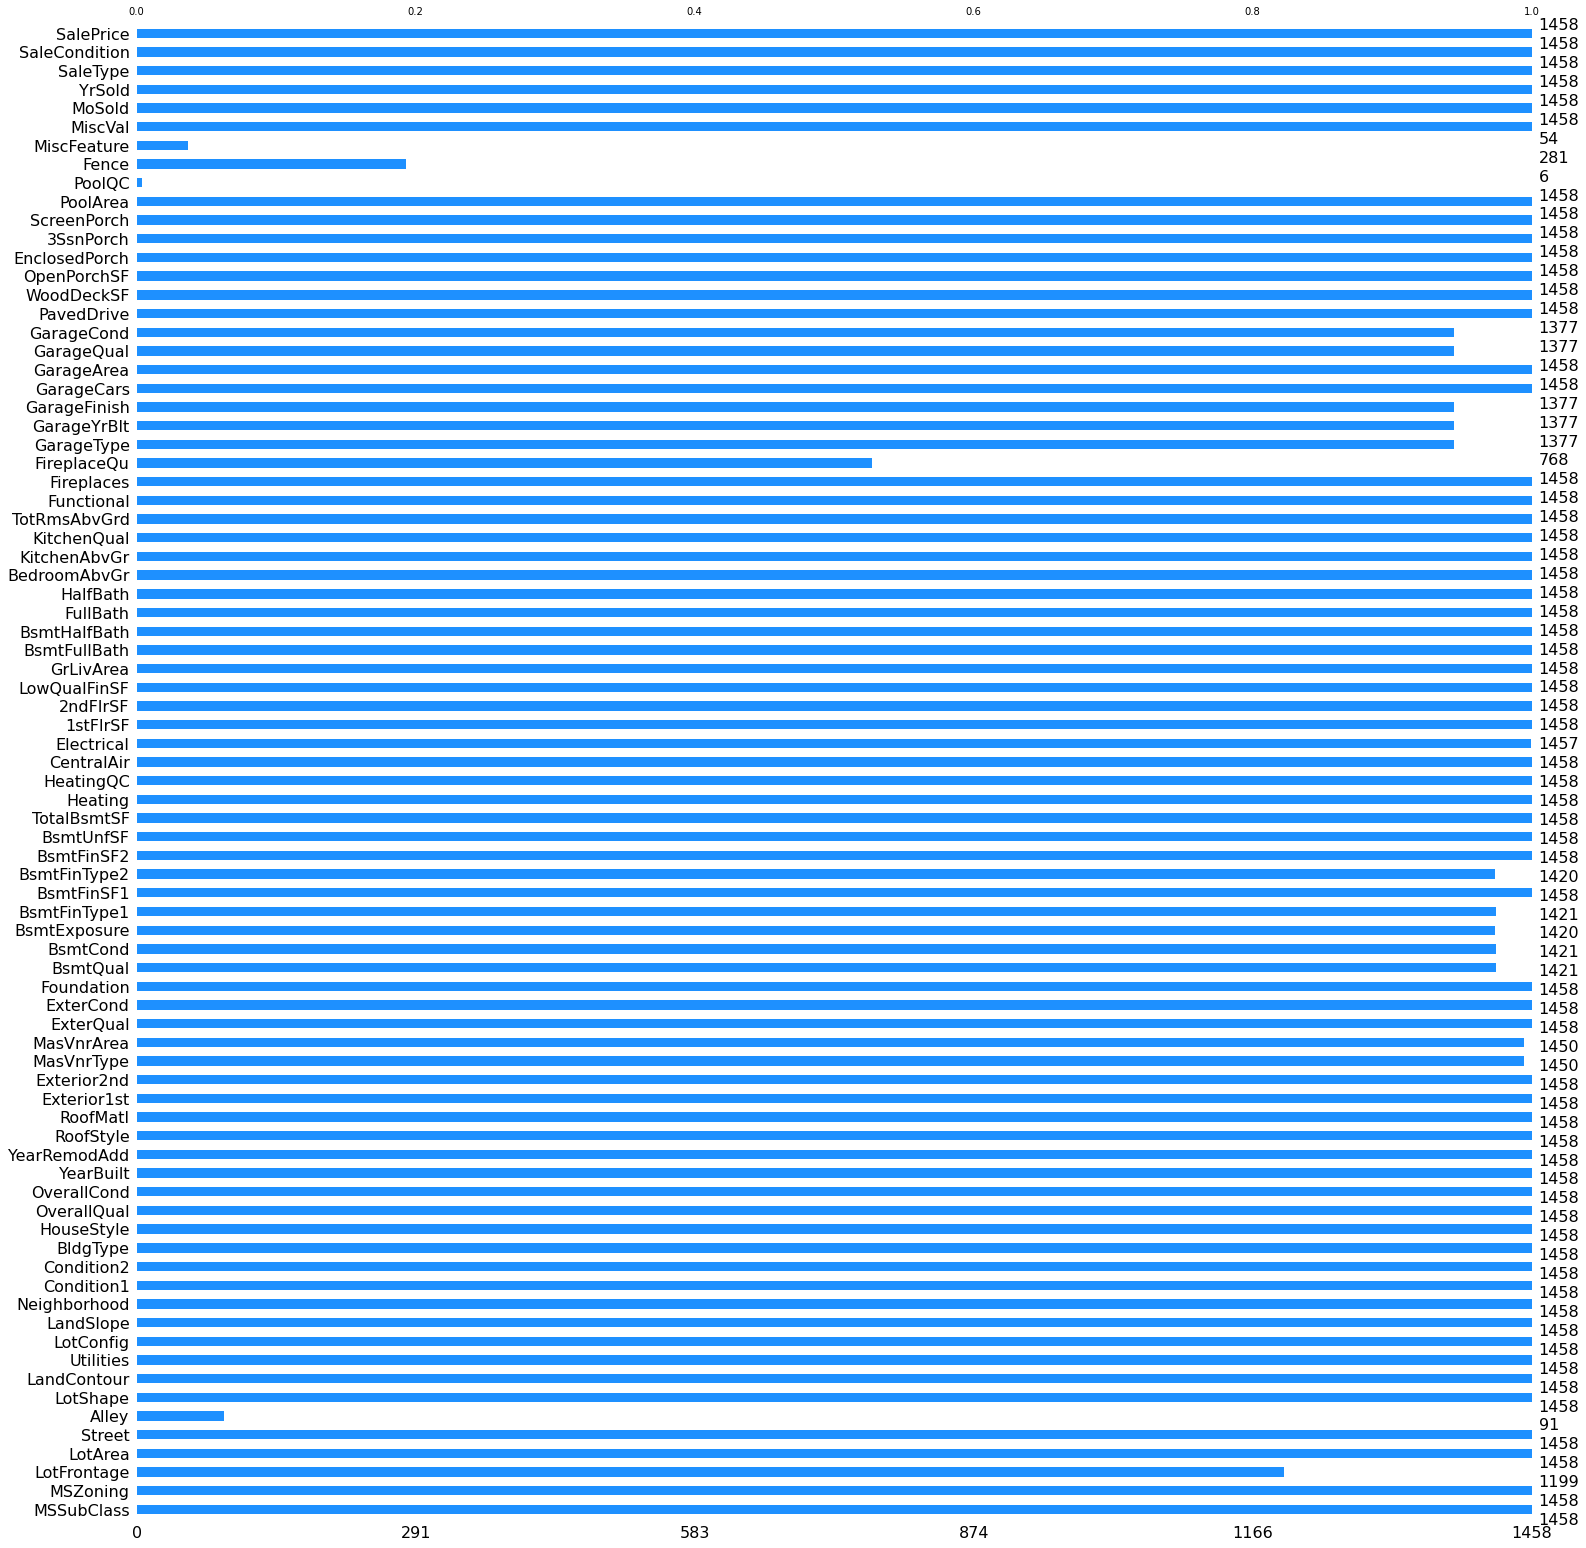

In [24]:
df_train = pd.read_csv(path + 'train_dropped_outliers.csv')
msno.bar(df_train, color='Dodgerblue')
plt.show()


The columns with more than 50% missing data will be dropped.

In [25]:
percentage_missing = round(100 * df_train.isnull().sum()/len(df_train),2)
percentage_missing = percentage_missing.sort_values()
percentage_missing


MSSubClass        0.00
TotalBsmtSF       0.00
Heating           0.00
SaleCondition     0.00
CentralAir        0.00
                 ...  
FireplaceQu      47.33
Fence            80.73
Alley            93.76
MiscFeature      96.30
PoolQC           99.59
Length: 80, dtype: float64

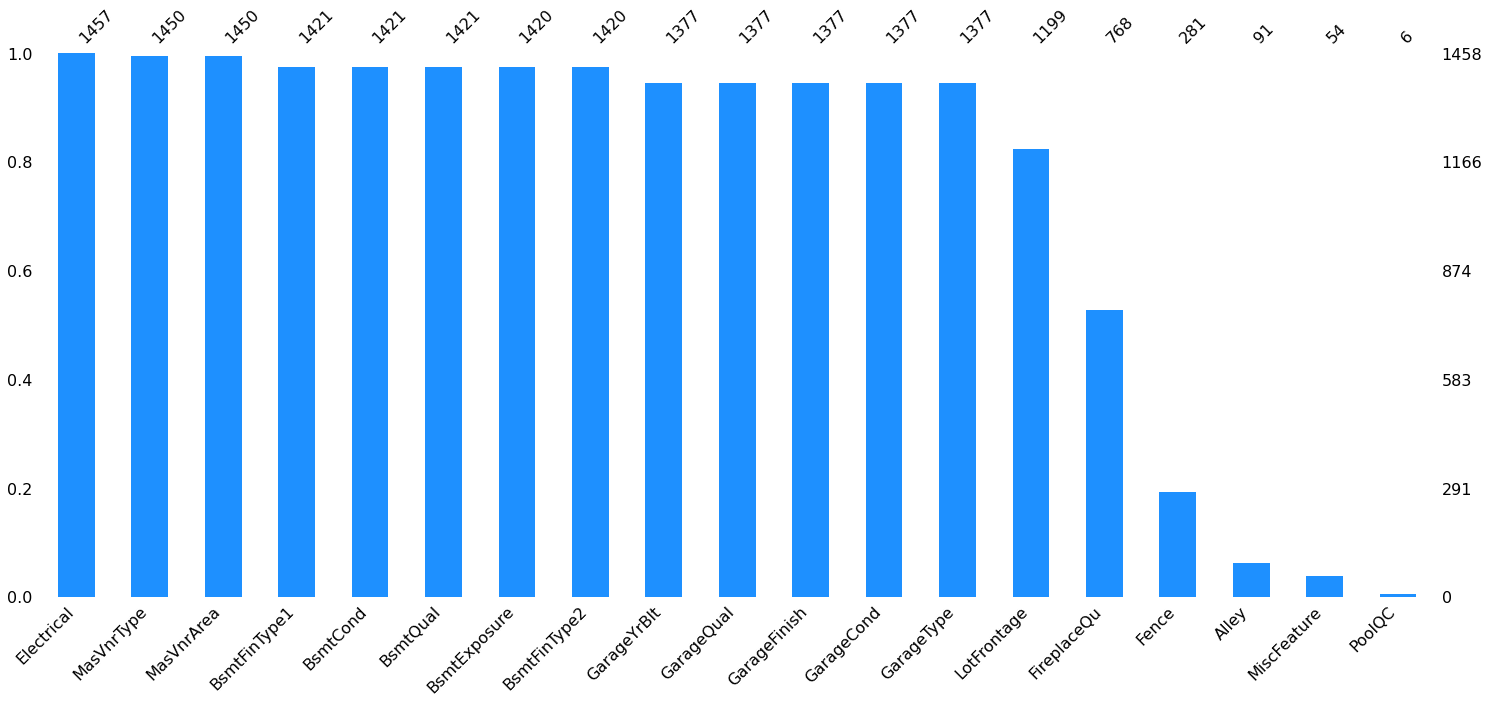

In [26]:
columns_missing = percentage_missing[percentage_missing > 0].index.tolist()
msno.bar(df_train[columns_missing], color='Dodgerblue')
plt.show()


In [27]:
columns_to_drop = percentage_missing[percentage_missing > 50.].index.tolist()
columns_to_drop


['Fence', 'Alley', 'MiscFeature', 'PoolQC']

In [28]:
df_train = df_train.drop(columns_to_drop, axis=1)
df_missing = df_train.isnull().sum()
df_missing


MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
Street             0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 76, dtype: int64

The columns with less than 50% of missing values will be analysed and the missing values will be replaced.

In [29]:
df_missing = df_missing[df_missing!=0]
columns_to_replace_miss = df_missing.index.tolist()
columns_to_replace_miss


['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [30]:
df_test = df_test.drop(columns_to_drop, axis=1)


Anlysis of missing values/rows.


In [31]:
for item in columns_to_replace_miss:
  if len(df_train[df_train[item].isnull()]) < 100:
   print(f'{item} : {df_train[df_train[item].isnull()].index}')
  else:
    continue


MasVnrType : Int64Index([234, 529, 650, 936, 973, 977, 1243, 1278], dtype='int64')
MasVnrArea : Int64Index([234, 529, 650, 936, 973, 977, 1243, 1278], dtype='int64')
BsmtQual : Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')
BsmtCond : Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  984, 1000, 1011, 1035, 1045, 1048, 1049, 1090, 1179, 1216,
            1218, 1232, 1321, 1412],
           dtype='int64')
BsmtExposure : Int64Index([  17,   39,   90,  102,  156,  182,  259,  342,  362,  371,  392,
             520,  532,  533,  553,  646,  705,  736,  749,  778,  868,  894,
             897,  948,  984, 1000, 1011, 1035,

since feature 'Electrical' is missing only one value this row will be  dropped.

In [32]:
df_train = df_train.dropna(axis=0, subset=['Electrical'])


In [33]:
df_test = df_test.dropna(axis=0, subset=['Electrical'])


In [34]:
bsmt = list()
for item in df_train.columns.values:
  if 'Bsmt' in item:
    bsmt.append(item)
  else:
    continue
bsmt


['BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'BsmtFullBath',
 'BsmtHalfBath']

In [35]:
df_train[df_train['BsmtQual'].isnull()][bsmt]


,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


In [36]:
df_train[df_train['BsmtExposure'].isnull()][bsmt]

,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,BsmtFullBath,BsmtHalfBath
17,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
39,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
90,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
102,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
156,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
182,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
259,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
342,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
362,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0
371,NaN,NaN,NaN,NaN,0,NaN,0,0,0,0,0


There is a row with not all null and NaN values while the Exposure is missing, because of the meaning of the feature the missing value will be replaced by 'None'.

In [37]:
d_info.get('BsmtExposure')


' Refers to walkout or garden level walls'

From the result above it is obvious that all the rows with the missing values at some of the cathegorical feature describing basement is having 0 values at numerical features describing basement, so the missing values will be replaced with the 'None' value or 'NA'. 

In [38]:
for item in bsmt:
  if df_train[item].dtype == 'O':
    df_train[item] = df_train[item].fillna('None')
  else:
    df_train[item] = df_train[item].fillna(0)
df_train[bsmt].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   BsmtQual      1457 non-null   object
 1   BsmtCond      1457 non-null   object
 2   BsmtExposure  1457 non-null   object
 3   BsmtFinType1  1457 non-null   object
 4   BsmtFinSF1    1457 non-null   int64 
 5   BsmtFinType2  1457 non-null   object
 6   BsmtFinSF2    1457 non-null   int64 
 7   BsmtUnfSF     1457 non-null   int64 
 8   TotalBsmtSF   1457 non-null   int64 
 9   BsmtFullBath  1457 non-null   int64 
 10  BsmtHalfBath  1457 non-null   int64 
dtypes: int64(6), object(5)
memory usage: 136.6+ KB


In [39]:
for item in bsmt:
  if df_test[item].dtype == 'O':
    df_test[item] = df_test[item].fillna('None')
  else:
    df_test[item] = df_test[item].fillna(0)
df_test[bsmt].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   BsmtQual      1459 non-null   object 
 1   BsmtCond      1459 non-null   object 
 2   BsmtExposure  1459 non-null   object 
 3   BsmtFinType1  1459 non-null   object 
 4   BsmtFinSF1    1459 non-null   float64
 5   BsmtFinType2  1459 non-null   object 
 6   BsmtFinSF2    1459 non-null   float64
 7   BsmtUnfSF     1459 non-null   float64
 8   TotalBsmtSF   1459 non-null   float64
 9   BsmtFullBath  1459 non-null   float64
 10  BsmtHalfBath  1459 non-null   float64
dtypes: float64(6), object(5)
memory usage: 136.8+ KB


In [40]:
garg = list()
for item in df_train.columns.values:
  if 'Garage' in item:
    garg.append(item)
  else:
    continue
garg


['GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond']

In [41]:
df_train[df_train['GarageQual'].isnull()][garg]


,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond
39,NaN,NaN,NaN,0,0,NaN,NaN
48,NaN,NaN,NaN,0,0,NaN,NaN
78,NaN,NaN,NaN,0,0,NaN,NaN
88,NaN,NaN,NaN,0,0,NaN,NaN
89,NaN,NaN,NaN,0,0,NaN,NaN
...,...,...,...,...,...,...,...
1349,NaN,NaN,NaN,0,0,NaN,NaN
1407,NaN,NaN,NaN,0,0,NaN,NaN
1449,NaN,NaN,NaN,0,0,NaN,NaN
1450,NaN,NaN,NaN,0,0,NaN,NaN


All the columns with the cathegorical data and describing some garage property that have missing values have at the numerical data columns describing garage property values 0, meaning the house doesn't have the garage so cathegorical values will be replaced with 'None' value.

In [42]:
for item in garg:
  if df_train[item].dtype == 'O':
    df_train[item] = df_train[item].fillna('None')
  else:
    df_train[item] = df_train[item].fillna(0)
df_train[garg].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageType    1457 non-null   object 
 1   GarageYrBlt   1457 non-null   float64
 2   GarageFinish  1457 non-null   object 
 3   GarageCars    1457 non-null   int64  
 4   GarageArea    1457 non-null   int64  
 5   GarageQual    1457 non-null   object 
 6   GarageCond    1457 non-null   object 
dtypes: float64(1), int64(2), object(4)
memory usage: 91.1+ KB


In [43]:
for item in garg:
  if df_test[item].dtype == 'O':
    df_test[item] = df_test[item].fillna('None')
  else:
    df_test[item] = df_test[item].fillna(0)
df_test[garg].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   GarageType    1459 non-null   object 
 1   GarageYrBlt   1459 non-null   float64
 2   GarageFinish  1459 non-null   object 
 3   GarageCars    1459 non-null   float64
 4   GarageArea    1459 non-null   float64
 5   GarageQual    1459 non-null   object 
 6   GarageCond    1459 non-null   object 
dtypes: float64(3), object(4)
memory usage: 91.2+ KB


In [44]:
mason = list()
for item in df_train.columns.values:
  if 'Mas' in item:
    mason.append(item)
  else:
    continue
mason


['MasVnrType', 'MasVnrArea']

The same reasoning applies to Masonary Veneering type and Area.

In [45]:
df_train[df_train['MasVnrType'].isnull()][mason]


,MasVnrType,MasVnrArea
234,NaN,NaN
529,NaN,NaN
650,NaN,NaN
936,NaN,NaN
973,NaN,NaN
977,NaN,NaN
1243,NaN,NaN
1278,NaN,NaN


In [46]:
for item in mason:
  if df_train[item].dtype == 'O':
    df_train[item] = df_train[item].fillna('None')
  else:
    df_train[item] = df_train[item].fillna(0)
df_train[mason].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MasVnrType  1457 non-null   object 
 1   MasVnrArea  1457 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.1+ KB


In [47]:
for item in mason:
  if df_test[item].dtype == 'O':
    df_test[item] = df_test[item].fillna('None')
  else:
    df_test[item] = df_test[item].fillna(0)
df_test[mason].info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MasVnrType  1459 non-null   object 
 1   MasVnrArea  1459 non-null   float64
dtypes: float64(1), object(1)
memory usage: 34.2+ KB


In [48]:
print(d_info.get('LotFrontage'))
print(d_info.get('Neighborhood'))


 Linear feet of street connected to property
 Physical locations within Ames city limits


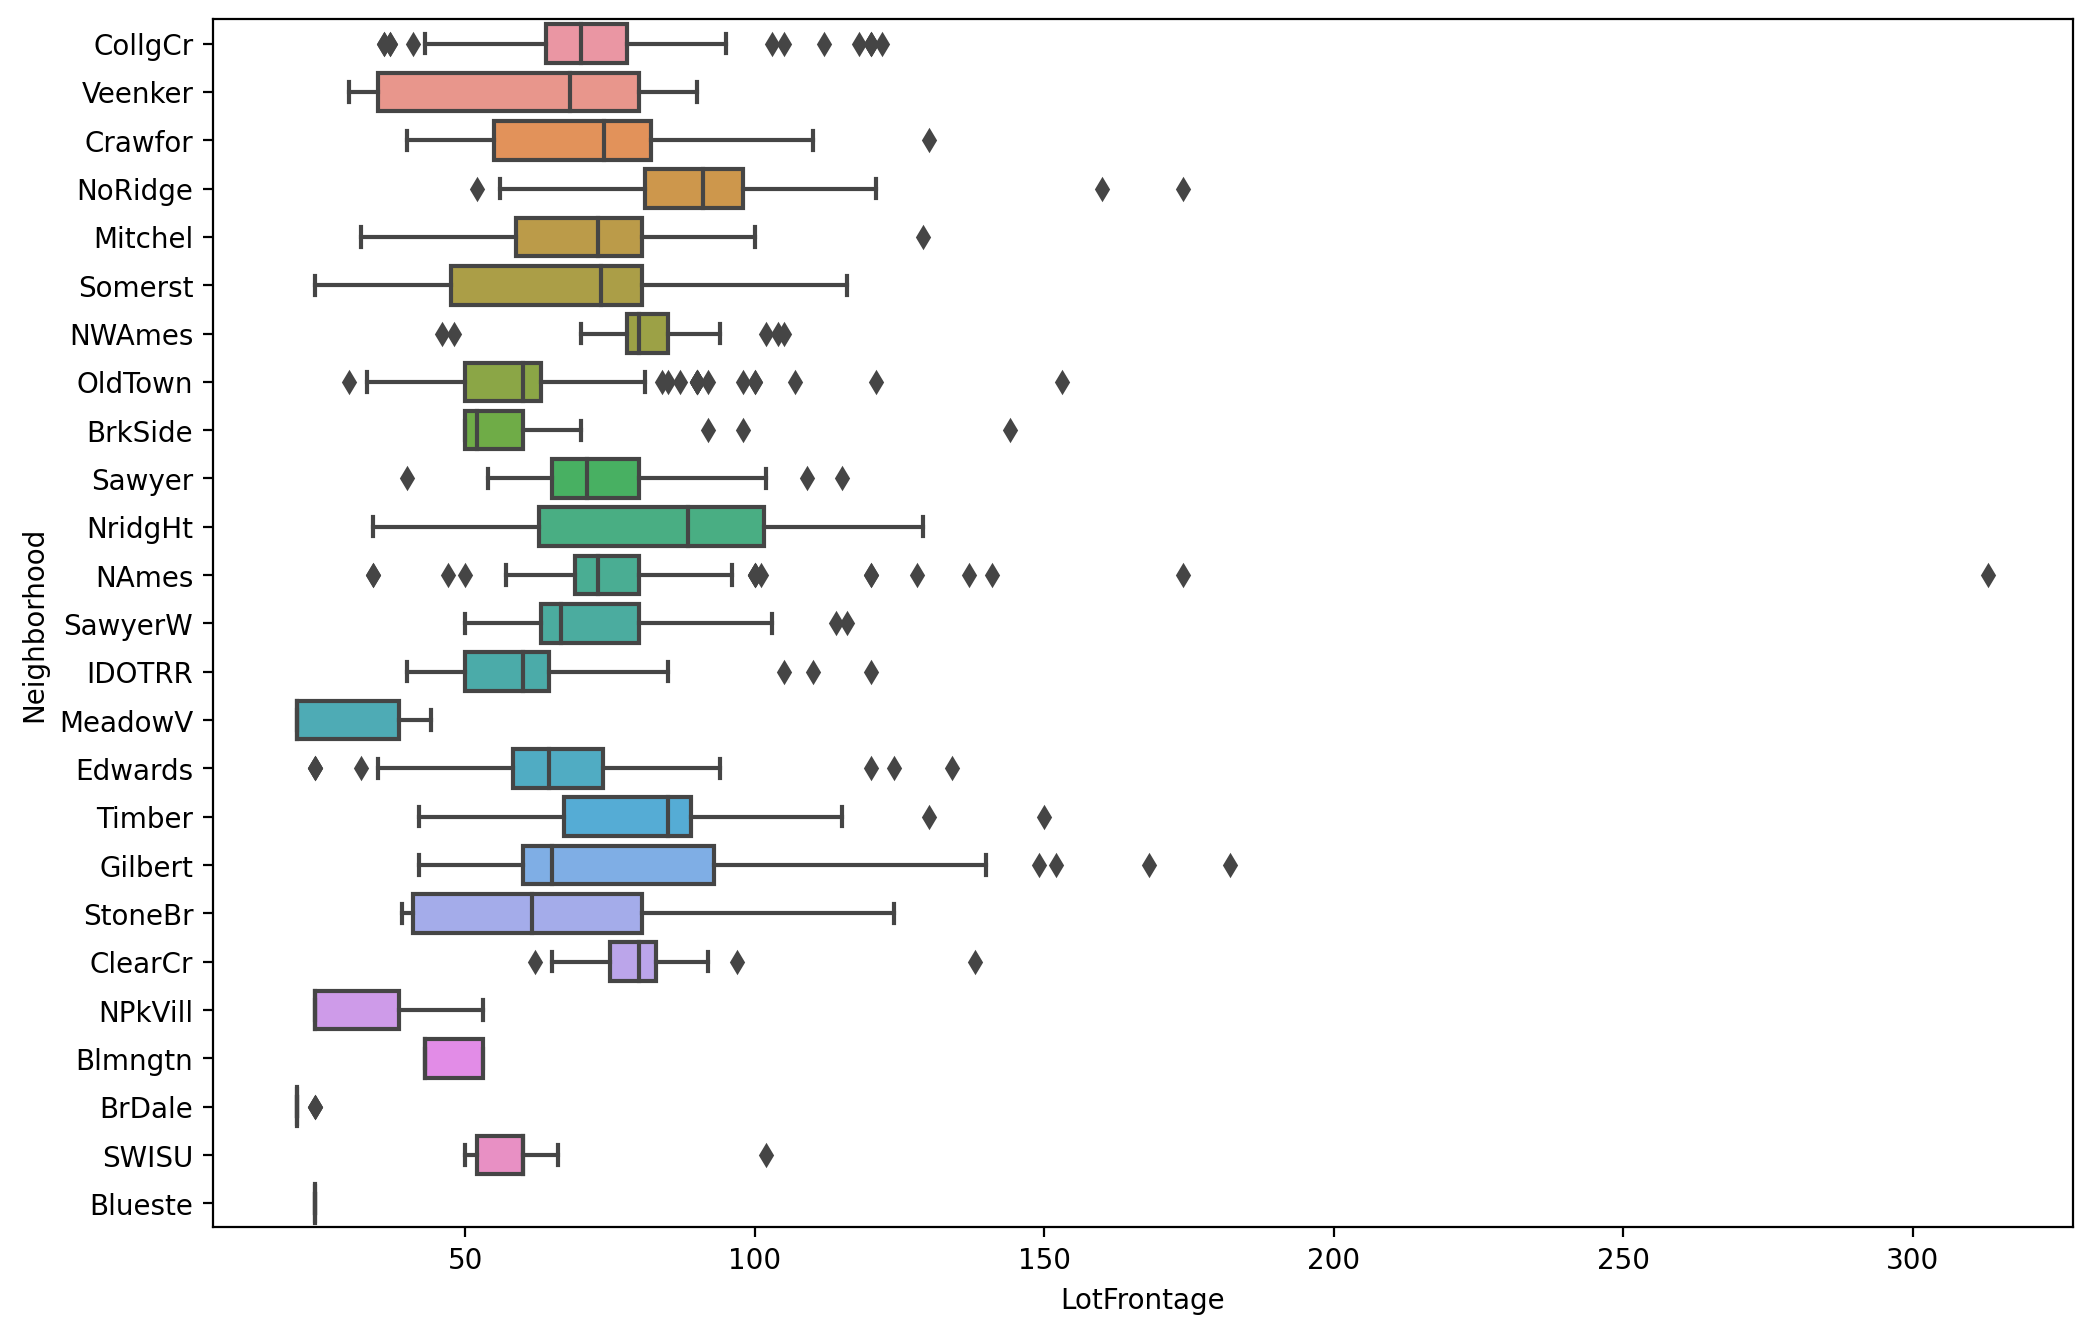

In [49]:
plt.figure(figsize=(12, 8), dpi=200)
sns.boxplot(x='LotFrontage', y='Neighborhood', data=df_train, orient='h')


In [54]:
df_temp = df_train.groupby('Neighborhood')['LotFrontage'].mean()


In [51]:
df_train['LotFrontage'] = df_train.groupby('Neighborhood')['LotFrontage'].transform(lambda value: value.fillna(value.mean()))

In [52]:
df_train['LotFrontage'] = df_train['LotFrontage'].fillna(0)

In [53]:
df_temporary = df_test[df_test['LotFrontage'].isnull()]
df_temporary = df_temporary['Neighborhood']


In [55]:
for label, content in df_temporary.items():
  df_test['LotFrontage'] = df_test['LotFrontage'].fillna(df_temp[content])
  

In [56]:
df_test['LotFrontage'].isnull().sum()

0

In [57]:
df_train.isnull().sum()

MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 76, dtype: int64

In [58]:
df_train['FireplaceQu'] = df_train['FireplaceQu'].fillna('None')

In [59]:
df_test['FireplaceQu'] = df_test['FireplaceQu'].fillna('None')

In [60]:
temp_list = ['Electrical',
              'MasVnrType',
              'MasVnrArea',
              'BsmtFinType1',
              'BsmtCond',
              'BsmtQual',
              'BsmtExposure',
              'BsmtFinType2',
              'GarageYrBlt',
              'GarageQual',
              'GarageFinish',
              'GarageCond',
              'GarageType',
              'LotFrontage',
              'FireplaceQu']

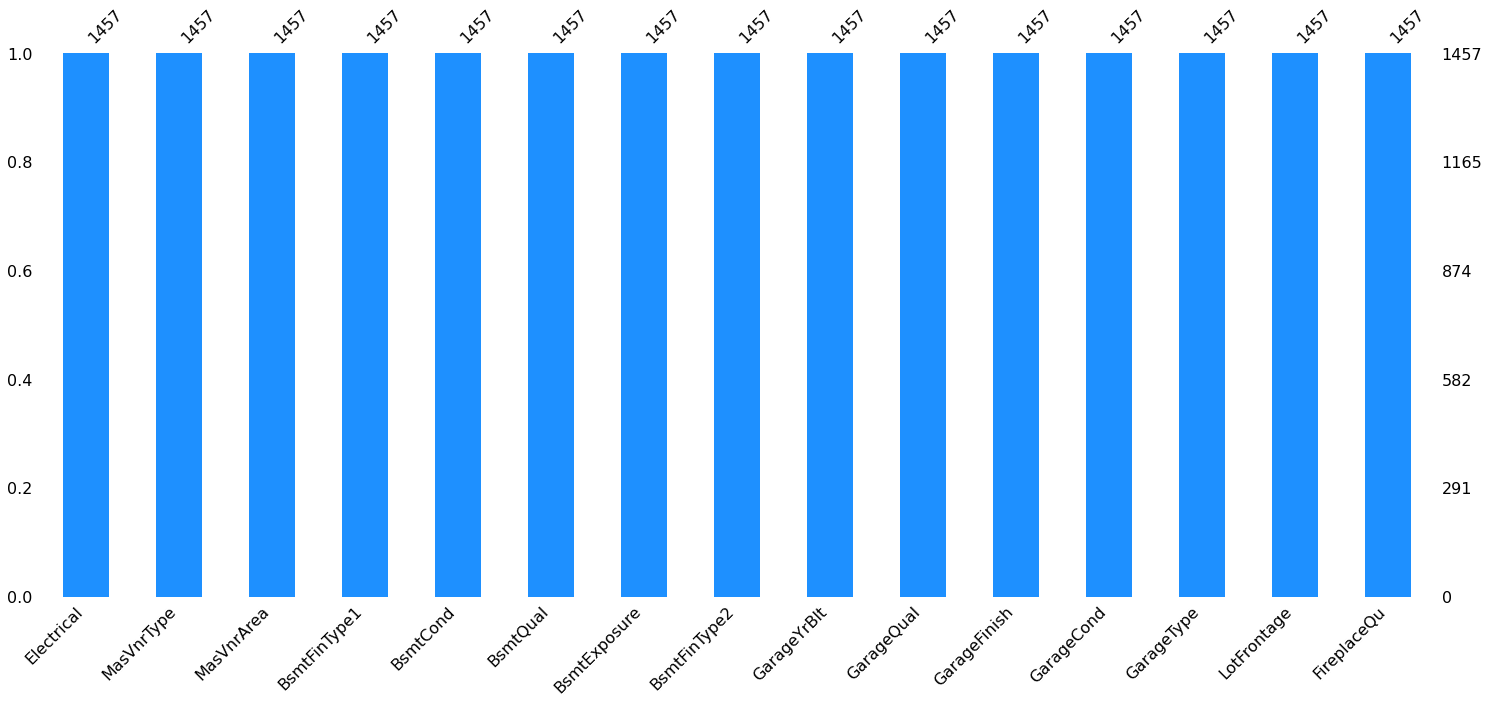

In [61]:
msno.bar(df_train[temp_list], color='Dodgerblue')
plt.show()

#Handling cathegorical data

In [62]:
for item in df_train.columns.values.tolist():
  if df_train[item].dtype=='O':
    nun = df_train[item].nunique()
    un = df_train[item].unique()
    vc = df_train[item].value_counts()
    print(f'\n {item:15} {nun:15} \t\t {un}')
    


 MSZoning                      5 		 ['RL' 'RM' 'C (all)' 'FV' 'RH']

 Street                        2 		 ['Pave' 'Grvl']

 LotShape                      4 		 ['Reg' 'IR1' 'IR2' 'IR3']

 LandContour                   4 		 ['Lvl' 'Bnk' 'Low' 'HLS']

 Utilities                     2 		 ['AllPub' 'NoSeWa']

 LotConfig                     5 		 ['Inside' 'FR2' 'Corner' 'CulDSac' 'FR3']

 LandSlope                     3 		 ['Gtl' 'Mod' 'Sev']

 Neighborhood                 25 		 ['CollgCr' 'Veenker' 'Crawfor' 'NoRidge' 'Mitchel' 'Somerst' 'NWAmes'
 'OldTown' 'BrkSide' 'Sawyer' 'NridgHt' 'NAmes' 'SawyerW' 'IDOTRR'
 'MeadowV' 'Edwards' 'Timber' 'Gilbert' 'StoneBr' 'ClearCr' 'NPkVill'
 'Blmngtn' 'BrDale' 'SWISU' 'Blueste']

 Condition1                    9 		 ['Norm' 'Feedr' 'PosN' 'Artery' 'RRAe' 'RRNn' 'RRAn' 'PosA' 'RRNe']

 Condition2                    8 		 ['Norm' 'Artery' 'RRNn' 'Feedr' 'PosA' 'PosN' 'RRAn' 'RRAe']

 BldgType                      5 		 ['1Fam' '2fmCon' 'Duplex' 'TwnhsE' '

The feature 'OverallQual', even though it is numerical actually it is cathegorical, but because it is ordinal and order makes sense it can remain as numerical feature. The feature 'MSSubClass'is actually cathegorical and cathegories are designated with numbers, ordinallity in this feature doesn't make sense so the feature will be regarded as cathegorical.

In [63]:
df_train.groupby(['MSSubClass'])['SalePrice'].mean().sort_values()

MSSubClass
30      95829.724638
180    102300.000000
45     108591.666667
190    129613.333333
90     133541.076923
160    138647.380952
50     143302.972222
85     147810.000000
40     156125.000000
70     166772.416667
80     169775.789474
20     185224.811567
75     192437.500000
120    200779.080460
60     240403.542088
Name: SalePrice, dtype: float64

<Figure size 1080x1080 with 0 Axes>

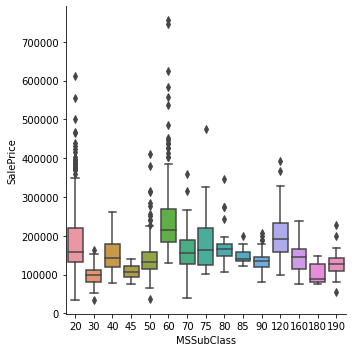

In [64]:
plt.figure(figsize=(15,15))
sns.catplot(x="MSSubClass", y="SalePrice", data=df_train, kind="box")
plt.show()

In [65]:
df_train['MSSubClass'] = df_train['MSSubClass'].apply(str)

In [66]:
df_test['MSSubClass'] = df_test['MSSubClass'].apply(str)

In [67]:
df_train_cat = df_train.select_dtypes(include='object')
df_train_num = df_train.select_dtypes(exclude='object')

In [68]:
df_train_dummies = pd.get_dummies(df_train_cat,drop_first=True)

In [69]:
df_train = pd.concat([df_train_num,df_train_dummies],axis=1)
df_train.head()

,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,80.0,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,68.0,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,60.0,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,84.0,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


In [70]:
df_train.corr()['SalePrice'].sort_values(ascending=False)

SalePrice           1.000000
OverallQual         0.795863
GrLivArea           0.734962
TotalBsmtSF         0.651553
GarageCars          0.641111
                      ...   
GarageFinish_Unf   -0.411144
BsmtQual_TA        -0.453018
FireplaceQu_None   -0.472413
KitchenQual_TA     -0.520124
ExterQual_TA       -0.589947
Name: SalePrice, Length: 259, dtype: float64

In [72]:
np.abs(df_train.corr())['SalePrice'].sort_values(ascending=False).head(10)

SalePrice       1.000000
OverallQual     0.795863
GrLivArea       0.734962
TotalBsmtSF     0.651553
GarageCars      0.641111
1stFlrSF        0.631667
GarageArea      0.629209
ExterQual_TA    0.589947
FullBath        0.562384
TotRmsAbvGrd    0.537826
Name: SalePrice, dtype: float64

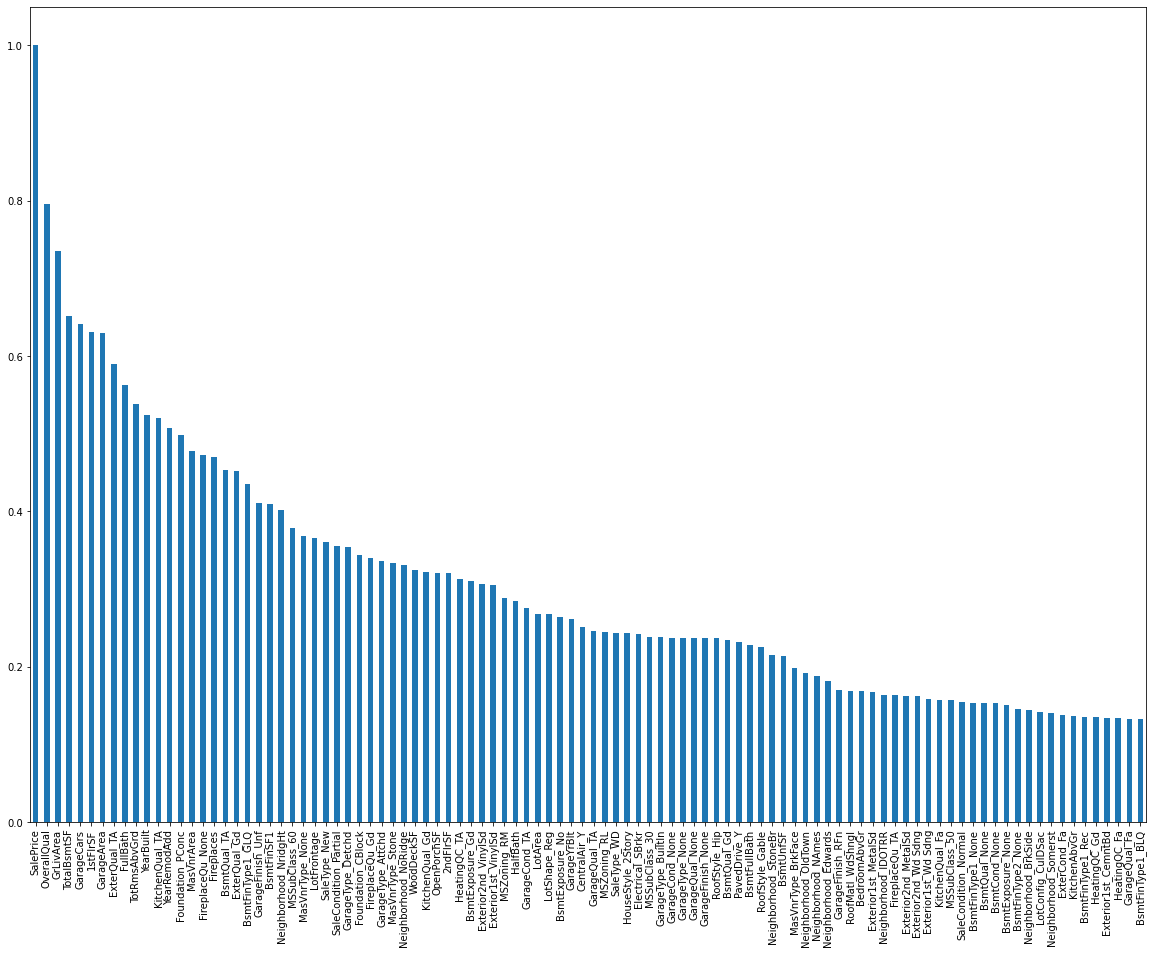

In [73]:
plt.figure(figsize=(20,15))
np.abs(df_train.corr())['SalePrice'].sort_values(ascending=False).head(100).plot(kind='bar')
plt.show()

In [74]:
df_test_cat = df_test.select_dtypes(include='object')
df_test_num = df_test.select_dtypes(exclude='object')

In [75]:
df_test_dummies = pd.get_dummies(df_test_cat,drop_first=True)

In [76]:
df_test = pd.concat([df_test_num,df_test_dummies],axis=1)

In [77]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1457 entries, 0 to 1459
Columns: 259 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(33), uint8(223)
memory usage: 770.7 KB


#Feature engineering_feature selection

In [78]:
X = df_train.drop("SalePrice", axis=1)
y = df_train["SalePrice"]
scaler = preprocessing.StandardScaler()
X = scaler.fit_transform(X)
scalerY = preprocessing.StandardScaler()
y = scalerY.fit_transform(y.values.reshape(-1,1))


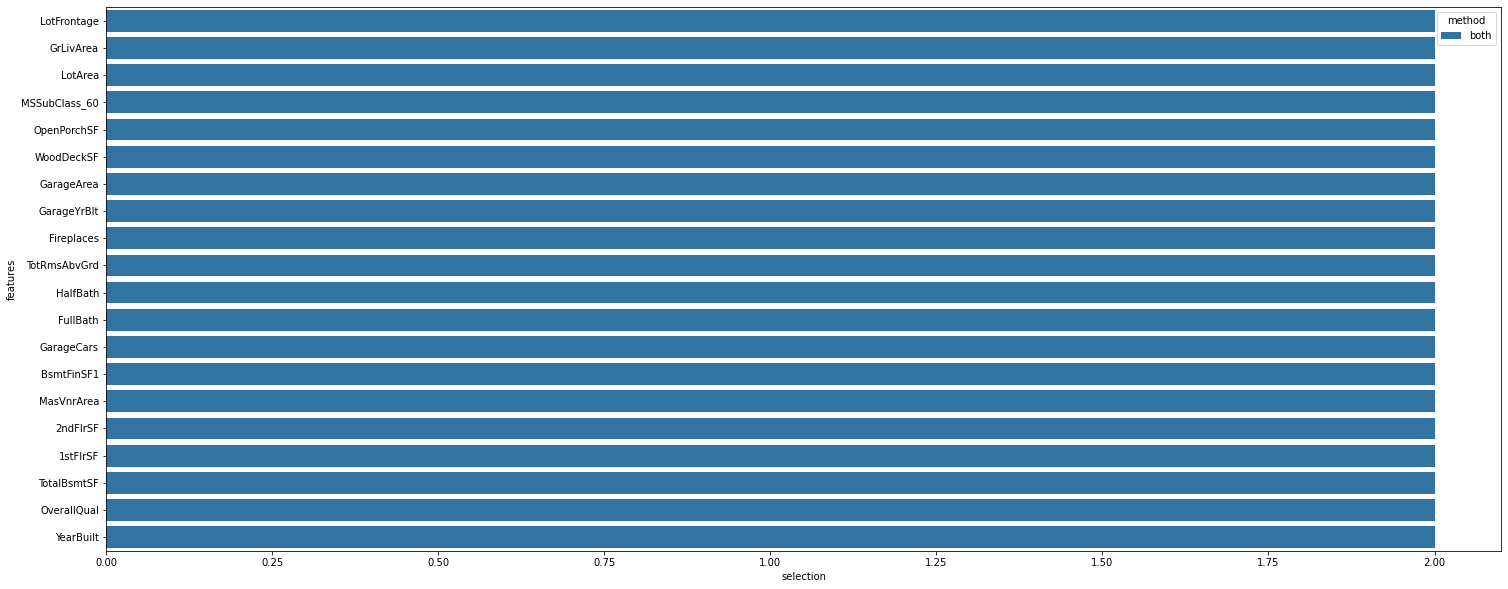

In [81]:
feature_names = df_train.drop("SalePrice", axis=1).columns


selector = feature_selection.SelectKBest(score_func=feature_selection.f_regression, k=50).fit(X,y)
pvalue_selected_features = feature_names[selector.get_support()]


selector = feature_selection.SelectFromModel(estimator=linear_model.ElasticNet(alpha=1.0, l1_ratio=1, fit_intercept=True), max_features=50).fit(X,y)
regularization_selected_features = feature_names[selector.get_support()]
 

df_features = pd.DataFrame({"features":feature_names})
df_features["p_value"] = df_features["features"].apply(lambda x: "p_value" if x in pvalue_selected_features else "")
df_features["num1"] = df_features["features"].apply(lambda x: 1 if x in pvalue_selected_features else 0)
df_features["regularization"] = df_features["features"].apply(lambda x: "regularization" if x in regularization_selected_features else "")
df_features["num2"] = df_features["features"].apply(lambda x: 1 if x in regularization_selected_features else 0)
df_features["method"] = df_features[["p_value","regularization"]].apply(lambda x: (x[0]+" "+x[1]).strip(), axis=1)
df_features["selection"] = df_features["num1"] + df_features["num2"]
df_features["method"] = df_features["method"].apply(lambda x: "both" if len(x.split()) == 2 else x)
plt.figure(figsize=(25,10))
sns.barplot(y="features", x="selection", hue="method", data=df_features.sort_values("selection", ascending=False).head(20), dodge=False)
plt.show()

In [82]:
regularization_selected_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'MSSubClass_160', 'MSSubClass_180',
       'MSSubClass_190', 'MSSubClass_20', 'MSSubClass_30', 'MSSubClass_40',
       'MSSubClass_45', 'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70',
       'MSSubClass_75', 'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90',
       'MSZoning_FV'],
      dtype='object')

In [83]:
pvalue_selected_features

Index(['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'FullBath', 'HalfBath', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'MSSubClass_60', 'MSZoning_RM', 'LotShape_Reg', 'Neighborhood_NoRidge',
       'Neighborhood_NridgHt', 'Exterior1st_VinylSd', 'Exterior2nd_VinylSd',
       'MasVnrType_None', 'MasVnrType_Stone', 'ExterQual_Gd', 'ExterQual_TA',
       'Foundation_CBlock', 'Foundation_PConc', 'BsmtQual_TA',
       'BsmtExposure_Gd', 'BsmtExposure_No', 'BsmtFinType1_GLQ',
       'HeatingQC_TA', 'CentralAir_Y', 'KitchenQual_Gd', 'KitchenQual_TA',
       'FireplaceQu_Gd', 'FireplaceQu_None', 'GarageType_Attchd',
       'GarageType_Detchd', 'GarageFinish_Unf', 'GarageQual_TA',
       'GarageCond_TA', 'SaleType_New', 'SaleCondition_Partial'],
      dtype='object')

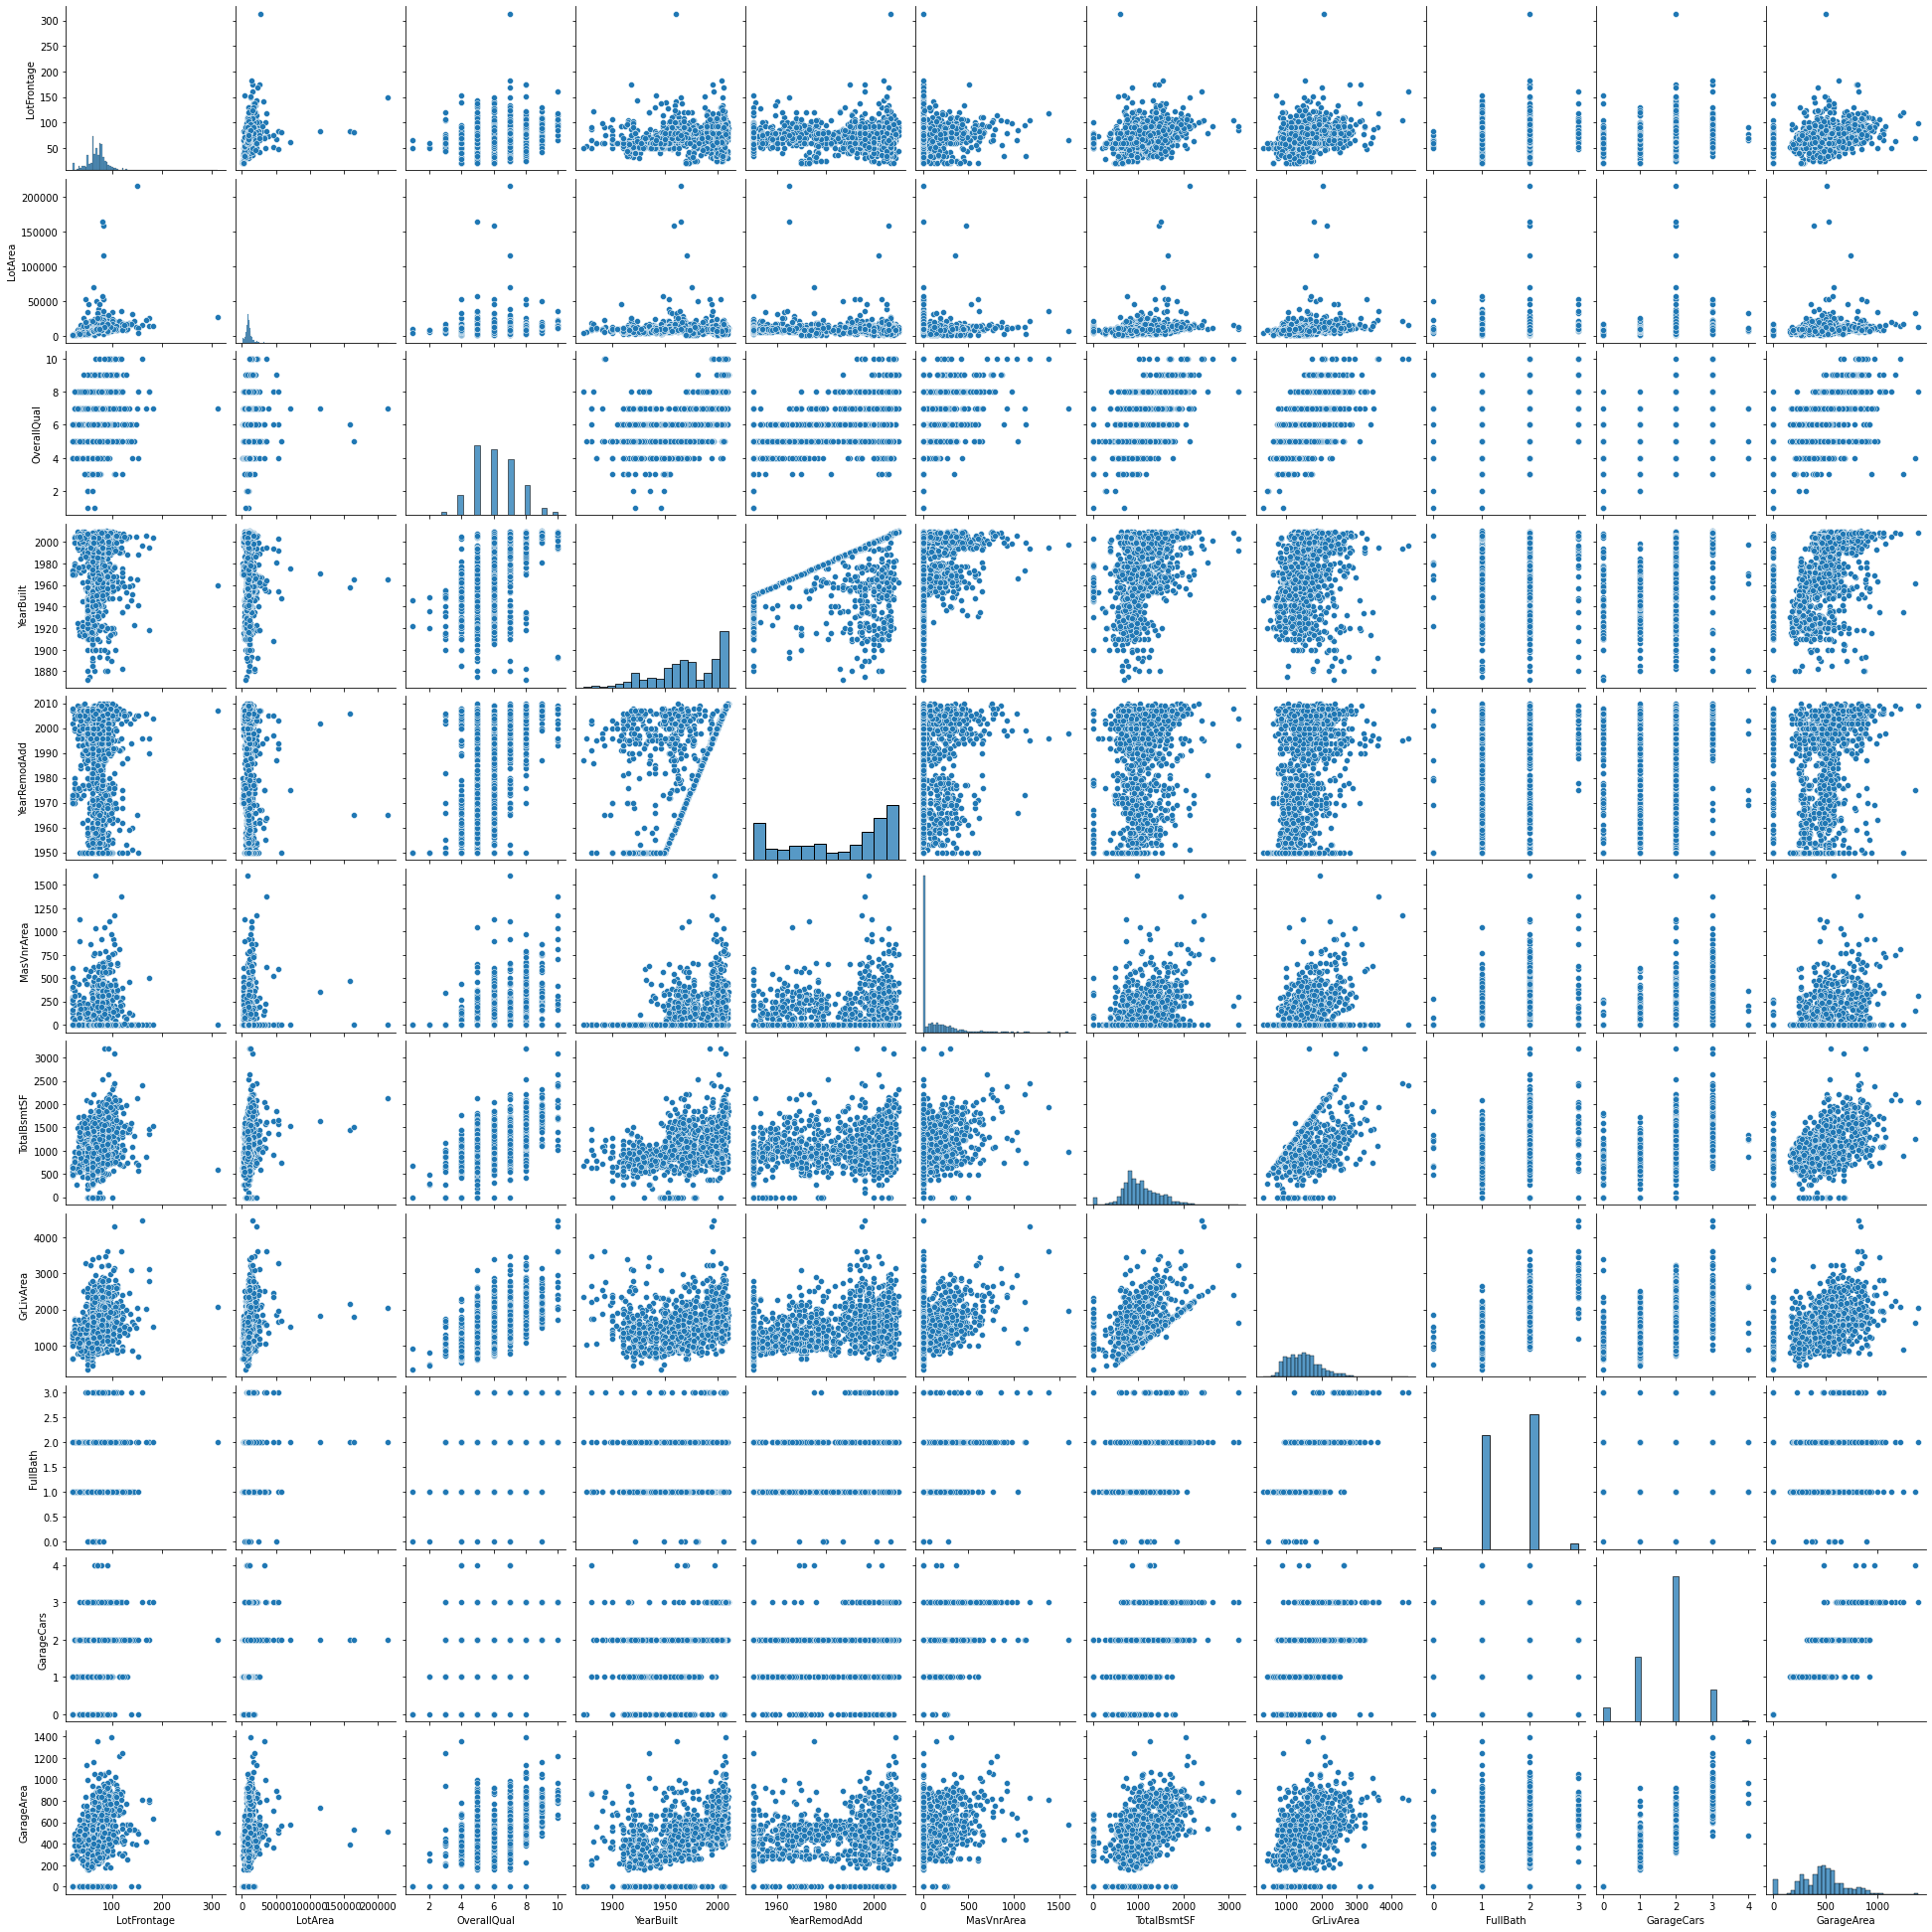

In [85]:
features = ['LotFrontage', 'LotArea', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'TotalBsmtSF', 'GrLivArea', 'FullBath', 'GarageCars', 'GarageArea']
sns.pairplot(data=df_train[features])

In [86]:
X_test = df_test[features]
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1459 entries, 0 to 1458
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   LotFrontage   1459 non-null   float64
 1   LotArea       1459 non-null   int64  
 2   OverallQual   1459 non-null   int64  
 3   YearBuilt     1459 non-null   int64  
 4   YearRemodAdd  1459 non-null   int64  
 5   MasVnrArea    1459 non-null   float64
 6   TotalBsmtSF   1459 non-null   float64
 7   GrLivArea     1459 non-null   int64  
 8   FullBath      1459 non-null   int64  
 9   GarageCars    1459 non-null   float64
 10  GarageArea    1459 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 136.8 KB


In [87]:
X = df_train[features]
y = df_train['SalePrice'].values.reshape(-1,1)
X_test = df_test[features]

In [90]:
train_rmse_errors = list()
test_rmse_errors = list()

for d in range(1,5):
  poly_converter = PolynomialFeatures(degree=d,include_bias=False)
  poly_features = poly_converter.fit_transform(X)
  X_train_train,  X_validate, y_train_train, y_validate = train_test_split(poly_features, y, test_size=0.2, random_state=101)
 
  model = LinearRegression()
  model.fit(X_train_train, y_train_train)

  train_pred = model.predict(X_train_train)
  test_pred = model.predict(X_validate)

  train_rmse = np.sqrt(mean_squared_error(y_train_train, train_pred))
  test_rmse = np.sqrt(mean_squared_error(y_validate, test_pred))

  train_rmse_errors.append(train_rmse)
  test_rmse_errors.append(test_rmse)
  

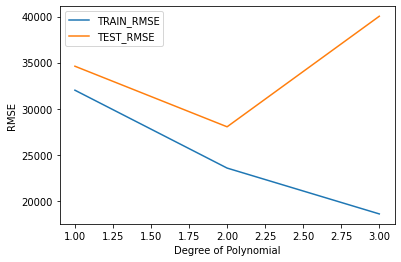

In [91]:
plt.plot(range(1,4), train_rmse_errors[0:3], label='TRAIN_RMSE')
plt.plot(range(1,4), test_rmse_errors[0:3], label='TEST_RMSE')

plt.xlabel('Degree of Polynomial')
plt.ylabel('RMSE')
plt.legend()


In [92]:
final_poly_converter = PolynomialFeatures(degree=2, include_bias=False)
X = final_poly_converter.fit_transform(X)

X_test = final_poly_converter.transform(X_test)


In [93]:
X_train, X_validate, y_train,  y_validate = train_test_split(X, y, test_size=0.2, random_state=101)


In [94]:
scalerX = preprocessing.StandardScaler()
scalerX.fit(X_train)


StandardScaler()

In [95]:
X_scaled = scalerX.transform(X)


In [96]:
X_train_scaled = scalerX.transform(X_train)
X_validate_scaled = scalerX.transform(X_validate)
X_test_scaled = scalerX.transform(X_test)


#Building a model

In [97]:
opt_models = list()


#Linear Regression

##Optimization of parameters

In [98]:
LM = linear_model.LinearRegression()
parameters = {"fit_intercept": [True, False]}
Grid0 = GridSearchCV(LM, parameters,scoring='neg_mean_squared_error', cv=5)
Grid0.fit(X_train_scaled, y_train)
BestLM=Grid0.best_estimator_
opt_models.append(BestLM)
BestLM


LinearRegression()

##Explained variance by the model

In [99]:
BestLM.fit(X_train_scaled, y_train)
BestLM_rmse = mean_squared_error(y_train, BestLM.predict(X_train_scaled))
print(f"Linear Regression RMSE:{BestLM_rmse:.3f}")
BestLM_mabser = mean_absolute_error(y_train, BestLM.predict(X_train_scaled))
print(f"Linear Regression RMSE:{BestLM_mabser:.3f}")
Best_LM_r2 = metrics.r2_score(y_train, BestLM.predict(X_train_scaled))
print(f"Linear Regression R2:{Best_LM_r2:.3f}")


Linear Regression RMSE:554439700.730
Linear Regression RMSE:16508.716
Linear Regression R2:0.913


In [100]:
scores = sklearn.model_selection.cross_validate(BestLM, X_train_scaled, y_train,
                                                scoring=['r2','neg_mean_squared_error','neg_mean_absolute_error'], cv=10)
scores = pd.DataFrame(scores)


In [101]:
scores


,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.018310,0.001329,0.867488,-5.216984e+08,-17216.676124
1,0.008942,0.001574,0.762972,-1.309956e+09,-20037.079108
2,0.016682,0.001685,0.916618,-7.952997e+08,-18673.221862
3,0.013702,0.001473,0.875008,-9.668823e+08,-18525.814870
4,0.013799,0.001284,0.872896,-8.868416e+08,-18881.442011
5,0.012787,0.001584,0.794741,-1.042053e+09,-20705.508203
6,0.010990,0.001277,0.920053,-5.018436e+08,-16172.961260
7,0.011289,0.001401,0.911826,-6.775947e+08,-19740.549578
8,0.010463,0.001412,0.876102,-6.747078e+08,-17377.624147
9,0.037416,0.001326,0.886932,-6.227213e+08,-18828.587343


##Model predictions

In [102]:
BestLM_rmse_val = mean_squared_error(y_validate, BestLM.predict(X_validate_scaled))
print(f"Linear Regression RMSE_VAL:{BestLM_rmse_val:.3f}")
BestLM_mabser_val = mean_absolute_error(y_validate, BestLM.predict(X_validate_scaled))
print(f"Linear Regression RMSE_VAL:{BestLM_mabser_val:.3f}")
Best_LM_r2_val = metrics.r2_score(y_validate, BestLM.predict(X_validate_scaled))
print(f"Linear Regression R2_VAL:{Best_LM_r2_val:.3f}")

Linear Regression RMSE_VAL:785703397.207
Linear Regression RMSE_VAL:19805.424
Linear Regression R2_VAL:0.868


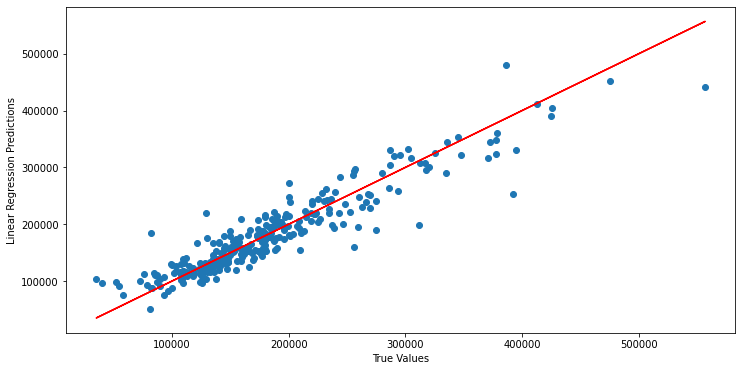

In [103]:
plt.figure(figsize=(12,6))
predictions = BestLM.fit(X_train_scaled, y_train).predict(X_validate_scaled)
plt.scatter(y_validate, predictions)
plt.xlabel('True Values')
plt.ylabel('Linear Regression Predictions')
plt.plot(y_validate, y_validate, 'r')
plt.show()

#Ridge Regression

##Optimization of parameters

In [104]:
RR = Ridge()
parameters = {'alpha':[0.001,0.005,0.01,0.1,0.5,1]}
Grid1 = GridSearchCV(RR, parameters,scoring='neg_mean_squared_error', cv=5)
Grid1.fit(X_train_scaled, y_train)
BestRR=Grid1.best_estimator_
opt_models.append(BestRR)
BestRR


Ridge(alpha=1)

##Explained variance by the model

In [105]:
BestRR.fit(X_train_scaled, y_train)
BestRR_rmse = mean_squared_error(y_train, BestRR.predict(X_train_scaled))
print(f"Ridge Regression RMSE:{BestRR_rmse:.3f}")
BestRR_mabser = mean_absolute_error(y_train, BestRR.predict(X_train_scaled))
print(f"Ridge Regression RMSE:{BestRR_mabser:.3f}")
Best_RR_r2 = metrics.r2_score(y_train, BestRR.predict(X_train_scaled))
print(f"Ridge Regression R2:{Best_RR_r2:.3f}")


Ridge Regression RMSE:586380021.103
Ridge Regression RMSE:16799.267
Ridge Regression R2:0.908


In [106]:
scores = sklearn.model_selection.cross_validate(BestRR, X_train_scaled, y_train,
                                                scoring=['r2','neg_mean_squared_error','neg_mean_absolute_error'], cv=10)
scores = pd.DataFrame(scores)


In [107]:
scores


,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.009894,0.001327,0.874032,-4.959330e+08,-16408.778956
1,0.002823,0.001149,0.701364,-1.650440e+09,-20180.213583
2,0.002989,0.001378,0.910173,-8.567689e+08,-18684.217371
3,0.003142,0.001184,0.883304,-9.027154e+08,-18033.340907
4,0.002592,0.001501,0.871111,-8.992978e+08,-19052.053195
5,0.002668,0.001191,0.790836,-1.061878e+09,-20795.656637
6,0.002999,0.001180,0.911403,-5.561389e+08,-16821.508655
7,0.002621,0.002173,0.923054,-5.913113e+08,-18193.613281
8,0.002883,0.001189,0.877737,-6.658046e+08,-17670.896683
9,0.002793,0.001157,0.881488,-6.526996e+08,-18887.392305


##Model predictions

In [108]:
BestRR_rmse_val = mean_squared_error(y_validate, BestRR.predict(X_validate_scaled))
print(f"Ridge Regression RMSE_VAL:{BestRR_rmse_val:.3f}")
BestRR_mabser_val = mean_absolute_error(y_validate, BestRR.predict(X_validate_scaled))
print(f"Ridge Regression RMSE_VAL:{BestRR_mabser_val:.3f}")
Best_RR_r2_val = metrics.r2_score(y_validate, BestRR.predict(X_validate_scaled))
print(f"Ridge Regression R2_VAL:{Best_RR_r2_val:.3f}")


Ridge Regression RMSE_VAL:823498685.091
Ridge Regression RMSE_VAL:19785.692
Ridge Regression R2_VAL:0.862


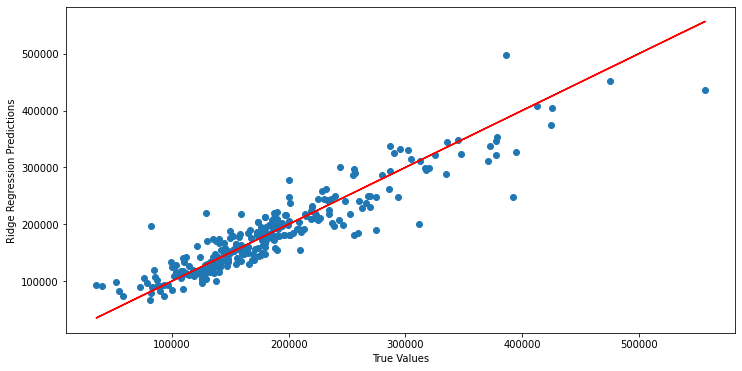

In [109]:
plt.figure(figsize=(12,6))
predictions = BestRR.fit(X_train_scaled, y_train).predict(X_validate_scaled)
plt.scatter(y_validate, predictions)
plt.xlabel('True Values')
plt.ylabel('Ridge Regression Predictions')
plt.plot(y_validate, y_validate, 'r')
plt.show()

#Lasso Regresion


##Optimization of parameters

In [110]:
Lasso_model = Lasso()
parameters = {'alpha':[1e-03,0.01,0.1,0.5,0.8,1]}
Grid2 = GridSearchCV(Lasso_model, parameters, scoring='neg_mean_squared_error', cv=5)
Grid2.fit(X_train_scaled, y_train)
BestL=Grid2.best_estimator_
opt_models.append(BestL)
BestL

Lasso(alpha=1)

##Explained variance by the model

In [111]:
BestL.fit(X_train_scaled, y_train)
BestL_rmse = mean_squared_error(y_train, BestL.predict(X_train_scaled))
print(f"Lasso RMSE:{BestL_rmse:.3f}")
Best_L_r2 = metrics.r2_score(y_train, BestL.predict(X_train_scaled))
BestL_mabser = mean_absolute_error(y_train, BestL.predict(X_train_scaled))
print(f"Lasso RMSE:{BestL_mabser:.3f}")
print(f"Lasso R2:{Best_L_r2:.3f}")


Lasso RMSE:586874871.627
Lasso RMSE:16864.622
Lasso R2:0.908


In [112]:
scores = sklearn.model_selection.cross_validate(BestL, X_train_scaled, y_train,
                                                scoring=['r2','neg_mean_squared_error','neg_mean_absolute_error'], cv=10)
scores = pd.DataFrame(scores)

In [113]:
scores

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.079867,0.001719,0.872626,-5.014681e+08,-16491.351728
1,0.073821,0.001316,0.594169,-2.242862e+09,-21157.386256
2,0.072662,0.001317,0.912607,-8.335486e+08,-18897.347336
3,0.074260,0.001405,0.881344,-9.178725e+08,-18141.935082
4,0.072327,0.001416,0.868918,-9.146010e+08,-19268.978486
5,0.079676,0.001376,0.769253,-1.171450e+09,-21573.512141
6,0.082447,0.001725,0.908911,-5.717819e+08,-16918.190668
7,0.094130,0.002359,0.920458,-6.112618e+08,-18634.403743
8,0.079823,0.001377,0.872143,-6.962671e+08,-18011.267314
9,0.081124,0.001419,0.883120,-6.437156e+08,-18796.265824


##Model predictions

In [115]:
BestL_rmse_val = mean_squared_error(y_validate, BestL.predict(X_validate_scaled))
print(f"Lasso RMSE_VAL:{BestL_rmse_val:.3f}")
BestL_mabser_val = mean_absolute_error(y_validate, BestL.predict(X_validate_scaled))
print(f"Lasso RMSE_VAL:{BestL_mabser_val:.3f}")
Best_L_r2_val = metrics.r2_score(y_validate, BestL.predict(X_validate_scaled))
print(f"Lasso R2_VAL:{Best_L_r2_val:.3f}")


Lasso RMSE_VAL:817819754.548
Lasso RMSE_VAL:19743.919
Lasso R2_VAL:0.863


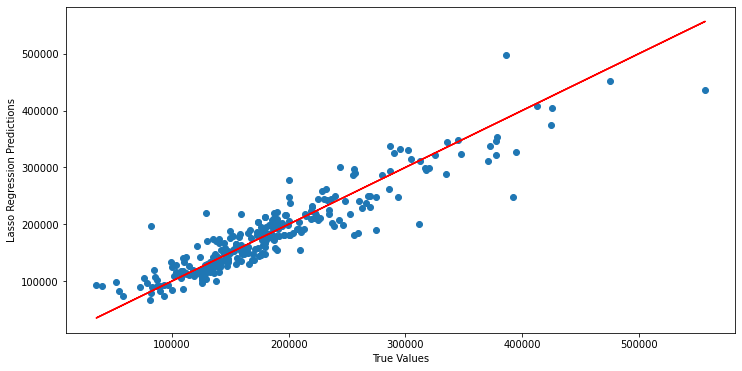

In [116]:
plt.figure(figsize=(12,6))
predictions = BestRR.fit(X_train_scaled, y_train).predict(X_validate_scaled)
plt.scatter(y_validate, predictions)
plt.xlabel('True Values')
plt.ylabel('Lasso Regression Predictions')
plt.plot(y_validate, y_validate, 'r')
plt.show()


#Elastic Net Regression

##Optimization of parameters

In [117]:
EN = ElasticNet()
parameters = {'alpha' :[0.1,1.0,10], 'l1_ratio':[1.]}
Grid3 = GridSearchCV(EN, parameters, scoring='neg_mean_squared_error', cv=5)
Grid3.fit(X_train_scaled, y_train)
BestEN=Grid3.best_estimator_
opt_models.append(BestEN)
BestEN


ElasticNet(alpha=10, l1_ratio=1.0)

##Explained variance by the model

In [118]:
BestEN.fit(X_train_scaled, y_train)
BestEN_rmse = mean_squared_error(y_train, BestEN.predict(X_train_scaled))
print(f"Elastic Net RMSE:{BestEN_rmse:.3f}")
BestEN_mabser = mean_absolute_error(y_train, BestEN.predict(X_train_scaled))
print(f"Elastic Net RMSE:{BestEN_mabser:.3f}")
Best_EN_r2 = metrics.r2_score(y_train, BestEN.predict(X_train_scaled))
print(f"Elastic Net R2:{Best_EN_r2:.3f}")


Elastic Net RMSE:588646573.251
Elastic Net RMSE:16853.459
Elastic Net R2:0.908


In [119]:
scores = sklearn.model_selection.cross_validate(BestEN, X_train_scaled, y_train,
                                                scoring=['r2','neg_mean_squared_error','neg_mean_absolute_error'], cv=10)
scores = pd.DataFrame(scores)

In [120]:
scores

,fit_time,score_time,test_r2,test_neg_mean_squared_error,test_neg_mean_absolute_error
0,0.241313,0.007896,0.872341,-5.025905e+08,-16439.686002
1,0.235252,0.001349,0.663187,-1.861428e+09,-20650.106825
2,0.184692,0.001579,0.912571,-8.338983e+08,-18660.125312
3,0.169982,0.001424,0.882365,-9.099765e+08,-18123.772548
4,0.201919,0.006731,0.870411,-9.041817e+08,-19134.298589
5,0.169446,0.001901,0.780358,-1.115073e+09,-21324.819289
6,0.194024,0.001670,0.911794,-5.536890e+08,-16803.733974
7,0.181225,0.001462,0.922141,-5.983288e+08,-18293.386102
8,0.202531,0.001719,0.876951,-6.700830e+08,-17772.995469
9,0.132542,0.001304,0.882519,-6.470249e+08,-18821.230093


##Model predictions

In [121]:
BestEN_rmse_val = mean_squared_error(y_validate, BestEN.predict(X_validate_scaled))
print(f"Elastic Net RMSE_VAL:{BestEN_rmse_val:.3f}")
BestEN_mabser_val = mean_absolute_error(y_validate, BestEN.predict(X_validate_scaled))
print(f"Elastic Net RMSE_VAL:{BestEN_mabser_val:.3f}")
Best_EN_r2_val = metrics.r2_score(y_validate, BestEN.predict(X_validate_scaled))
print(f"Elastic Net R2_VAL:{Best_EN_r2_val:.3f}")

Elastic Net RMSE_VAL:817815531.915
Elastic Net RMSE_VAL:19741.577
Elastic Net R2_VAL:0.863


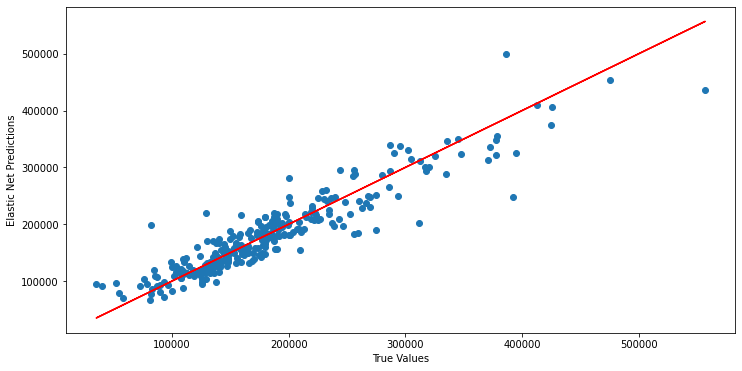

In [122]:
plt.figure(figsize=(12,6))
predictions = BestEN.fit(X_train_scaled, y_train).predict(X_validate_scaled)
plt.scatter(y_validate, predictions)
plt.xlabel('True Values')
plt.ylabel('Elastic Net Predictions')
plt.plot(y_validate, y_validate, 'r')
plt.show()

#Model selection and Conslucion

In [127]:
models_shortname =['LM','Ridge','Lasso','ELN']
opt_models


[LinearRegression(),
 Ridge(alpha=1),
 Lasso(alpha=1),
 ElasticNet(alpha=10, l1_ratio=1.0)]

In [129]:
from sklearn.model_selection import cross_val_score
results = list()

for item in opt_models:
	scores = cross_val_score(item, X_train_scaled, y_train, scoring='r2', cv=10)
	results.append(np.mean(scores))

result = pd.DataFrame( )
result['r_squared'] = results
result['model'] = models_shortname


In [130]:
result


,r_squared,model
0,0.868464,LM
1,0.862450,Ridge
2,0.848355,Lasso
3,0.857464,ELN


###Predictions on the useen data (the data are taken from the Kaggle competitions) 

The Linear Regression Model is the best explaining the variance of the data according to the r squared metrics.